<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# AESB1213 Probability and Statistics Lab
*Developed by Sandra Verhagen*
## Notebook 3: Expectation, variance, joint distributions

In this Notebook, we will have a look at the change-of-units and change-of-variable rules for expectation and variance, as well as joint distribution functions. 

Learning objectives:
* understand the application of the change-of-unit and change-of-variable rule
* evaluate and interpret a joint density function

Within the notebook you will need to run each code cell by hitting [SHIFT-ENTER]. We always need to start with importing some libraries, so to get started, run the following code.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns 

### Normal distribution

We will now look again at the dataset with heights and armspans of more than 200 TU Delft students (so more male than female students!). Let's first read the data.

In [2]:
def load_data(filename): # Same as earlier I had to change this into a function because my VS code had trouble
    path = ''
    data = pd.read_excel(path + filename, engine='openpyxl')
    return data

try:
    STUD = load_data('Leonardo.xlsx')  
    h = np.array(STUD['HEIGHT'])  
    a = np.array(STUD['ARMSPAN'])
    s = np.array(STUD['SEX'])      # SEX = 1 means male, SEX = 0 means female
except FileNotFoundError:
    print('ERROR!\nFile Leonardo.xlsx not found')

In [3]:
# STUD = pd.read_excel('Leonardo.xlsx')  
# h = np.array(STUD['HEIGHT'])  
# a = np.array(STUD['ARMSPAN'])
# S = np.array(STUD['SEX'])      # SEX = 1 means male, SEX = 0 means female
# print('Number of male students:', np.sum(S))
# print('Number of female students:', len(S)-np.sum(S))

Create a plot with the observed heights as well as the mean of all observed heights.

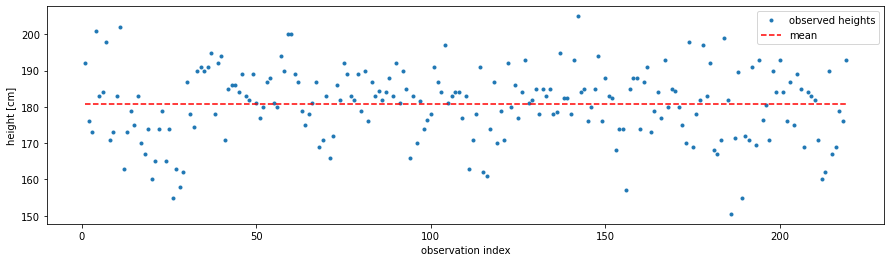

In [4]:
i = np.arange(1,len(h)+1)
plt.figure(figsize=(15, 4))
plt.plot(i, h,'.')
plt.plot(i, np.mean(h)*np.ones(len(h)),'--r')
plt.legend(['observed heights', 'mean'])
plt.xlabel('observation index')
plt.ylabel('height [cm]');

Let's look at the distribution of the heights, where we assume that $H \sim N(\mu, \sigma^2)$.

### Expectation (= mean)

We know that the expectation of a random variable $H$ is equal to the *mean*. If we observe the heights of many people, then the average of the observed heights will approach $E[H]$. If $H$ is normally distributed, we have that  $E[H]=\mu$. 

### Variance

The variance of a random variable is given by $E[(H-E[H])^2]$. How to interpret this? $H-E[H]$ is the deviation from the mean value, hence the variance is the 'mean of the squared deviations from the mean'. 
In case $H$ is normally distributed, we have that $Var(H)=\sigma^2$.

In the plot above, for each observation you can find the 'deviations from the mean' as the distance between the observed value and the mean value.

In summary: the expectation represents the mean outcome of a random variable, the variance is a measure of the variability with respect to the mean. 

#### Question 

#### 3.1 Considering $H \sim N(\mu, \sigma^2)$ and the definition of variance, explain why it is logical that a larger variance causes the probability density function to become 'flatter' (less peaked).

#### Answer:

3.1 For the normal distribution the variance is the same as the $\sigma$ also known as stadard deviation(std). The $\mu$ defines the "center" point of the normal distribution. The second variable indicates the spread of the symmetrical distribution. this means that a smaller std leads to more data "piled" near the "center" which leads to a higher peak since the total surface of all normal distributions stays at 1.

### Change-of-units rule

Now let's look at the *change-of-units* rule. The mean height of Delft students is known to be $\mu = 181$ cm, and the variance $\sigma^2 = 95$ cm$^2$.

We will denote the height in *inches* as $Y = r\cdot H + s$. 

#### Questions:

#### 3.2 What are the values of $r$ and $s$?

#### 3.3 What is the expectation $E[Y]$ of the height in inches?

#### 3.4 What is the variance $Var(Y)$ of the height in inches?

#### 3.5 What is the distribution of $Y$?

#### Answers:

#### 3.2 $r = \frac{1}{2.54} \approx 0.3937 $ , $s = 0$

the r means the scaling of the $\mu$. a total of 2.54 centimers go into every inch. which makes 1 over 2.54 times the height in cm's. the s refers to the shifting which in the case of cm's to inches does not occurs since both are linear units of measurements which intersect at 0.

#### 3.3 $E[Y]=$ ... 

The formula for $E[Y]=E[rX+s]=rE[X]+s$ which means that the $E[Y]=\frac{1}{2.54}*181+0 = 71.26$ inches.

#### 3.4 $Var(Y)=$ ...

The formula for the variance derives from $Var(Y)=Var(rX+s)=r^2 Var(X)$. which means that the $Var(Y)=(\frac{1}{2.54})^2*95 = 14.73$ inches.

#### 3.5

Suppose $X \sim N(\mu,\sigma^2)$, then the $RV$ $rX+s$ also has a normal distribution. the normal distribution can be denoted with $X \sim N(71.26,14.73)$

Fill in your answers to the previous questions in the code below and then run the code. 

You will see the histogram together with pdf of the height in meters ($H$), as well as those of the height in inches ($Y$).

The histogram of the height in inches is created after converting all observed heights to inches. You can see that the pdf of the transformed random variable $Y$ indeed fits that histogram well (if you filled in the correct values).

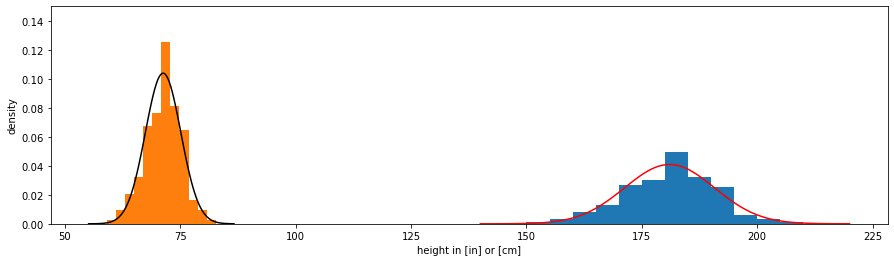

In [5]:
# Fill in your answers after the = signs:
r = 0.3937
s = 0
MU_inch = 71.26
VAR_inch = 14.73

# CONVERT OBSERVED HEIGHTS TO INCHES
y = r * h + s 

# first plot histogram and pdf of height in cm
binwidth = 5
binw = np.arange(140, 220, binwidth)
MU_cm = 181
VAR_cm = 95 
rx = np.linspace(140, 220, 100)
fx = norm.pdf(rx, loc=MU_cm, scale=np.sqrt(VAR_cm))

plt.figure(figsize=(15, 4))

#plt.subplot(121)
plt.hist(h, bins=binw, density='True')
plt.plot(rx, fx, 'r')

# now plot histogram and pdf of height in inches
binw_in = np.arange(r*140, r*220, r*binwidth)
ry = np.linspace(r*140, r*220, 100)
fy = norm.pdf(ry, loc=MU_inch, scale=np.sqrt(VAR_inch))

#plt.subplot(122)
plt.hist(y, bins=binw_in, density='True')
plt.plot(ry, fy, 'k')
plt.xlabel('height in [in] or [cm]')
plt.ylabel('density')
plt.ylim([0, 0.15]);


#### Question 

#### 3.6 Why is the pdf of $Y$ more peaked than the pdf of $H$?

#### Answer

#### 3.6

as explained in 3.1 the steepness of the peak is related to the variance and Y simply has a lower variance then H which leads to Y being "piled up" near the center of the normal distribution.

Choose $h_{me}$ equal to your own height.

#### Question 

#### 3.7 Compute the probability $P(H \leq h_{me})$ using table B.1 in the book (see page 106 in book). Show how you arrived at your answer.

#### Answer

3.7 

the formula for transforming a normal RV to a standard normal RV:

$Z = \frac{X-\mu}{\sigma}$ = $\frac{1}{\sigma}X$ - $\frac{\mu}{\sigma}$ where $E[Z] = 0$ and $Var(X)=1$

which leads to $\frac{198-181}{\sqrt(95)}=1.74$ this grants $P(H \leq h_{me})$ which cannot be used on the book as only $P(H \ge h_{me})$ will be accepted. the formula for this is through $1-P(H \leq h_{me})$. Which grants the actual size 0.9591.

You can check your own answer by filling in your height `h_me` in the code below.

In [7]:
h_me = 198

P_me = norm.cdf(h_me, loc=MU_cm, scale=np.sqrt(VAR_cm))
print(P_me)

0.9594346817555259


### Joint density function

We will now plot the histograms as well as a 'fitted' pdf, assuming that height $H$ and armspan $A$ are both normally distributed with the same $\mu$ and $\sigma$: $H\sim N(\mu, \sigma^2)$ and $A\sim N(\mu, \sigma^2)$.

We will use the same values for $\mu$ and $\sigma$ as before.

The figure on the right shows the scatterplot of height and armspan.

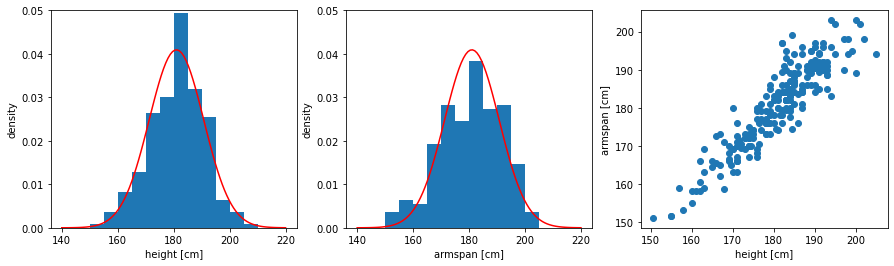

In [8]:
binwidth = 5
binw = np.arange(140, 220, binwidth)
MU_cm = 181
VAR_cm = 95 
rx = np.linspace(140, 220, 100)
fx = norm.pdf(rx, loc=MU_cm, scale=np.sqrt(VAR_cm))

plt.figure(figsize=(15, 4))

plt.subplot(131)
plt.hist(h, bins=binw, density='True')
plt.plot(rx, fx, 'r')
plt.xlabel('height [cm]')
plt.ylabel('density')
plt.ylim([0, 0.05])

plt.subplot(132)
plt.hist(a, bins=binw, density='True')
plt.plot(rx, fx, 'r')
plt.xlabel('armspan [cm]')
plt.ylabel('density')
plt.ylim([0, 0.05])

plt.subplot(133)
plt.plot(h, a, 'o')
plt.xlabel('height [cm]')
plt.ylabel('armspan [cm]');

The scatterplot shows that the height and armspan of humans are *correlated*: in this case a person with a large height is likely to have a large armspan, and a person with a small height is likely to have a small armspan. The relation is not perfectly linear, but still some kind of linear relationship is present.

#### Question 

#### 3.8 If there would have been no correlation at all between height and armspan, what would the scatterplot have looked like?

#### Answer

3.8 

now the scatterplot shows correlation which is shown by the fact that the value's "crowd" around the diagonal axis. if no correlation where present the entere graph would have dot's scattered.

We will now create a 2D histogram of the heights and armspan - this can be done by dividing the plot area of the scatterplot in a grid; instead of 'intervals', this results in 2-dimensional bins. The empirical probabilities are then equal to $density\; \times\; area$. 

In case you get an error message when running the next code block: see line 3 in the code.

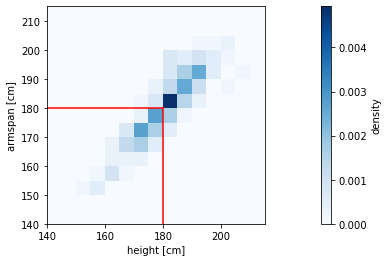

In [9]:
plt.figure(figsize=(20, 4))

# in case of an error message, put a # at the start of line 4, and remove the # in front of line 5
plt.hist2d(h, a, bins=[binw, binw], cmap='Blues', density='True')
# plt.hist2d(h, a, bins=[binw, binw], cmap='Blues', normed='True')
plt.axis('square')
plt.xlabel('height [cm]')
plt.ylabel('armspan [cm]');
cb = plt.colorbar()
cb.set_label('density')
plt.plot([140, 180], [180, 180], 'r')
plt.plot([180, 180], [140, 180], 'r');

The *joint distribution function* of two random variables $H$ and $A$ is defined as $F(x,y)= P(H\leq x, A\leq y)$. 

#### Question 3.9 How could we calculate the empirical probability $P( H\leq 180, A\leq 180)$? (just explain *how*, no need to calculate it)

Note that this is thus the empirical value for $F(180,180)$.

#### Question 3.10 Which figures in this notebook depict the *marginal* pdf of height and armspan?

#### Answers

3.9 

The area denoted in the graph above can be calculated using a joint density function which is defenid as follows:

Let H and A be two continuous RVs

The joint density function f of X and Y is the function $f : \rm |\!R^2 $ => $\rm |\!R $ such that

$P( H\leq 180, A\leq 180)$ = $\int_{-\infty}^{180}$ $\int_{-\infty}^{180} f(H,A) dH dA$

The order of the dH and dA is arbitrary since both a type 1 and 2 region can be used since the area is a square.

3.10

The marginal pdf's for height and armspan are the graphs after 3.7.

Below an alternative way to visualize the joint density function.

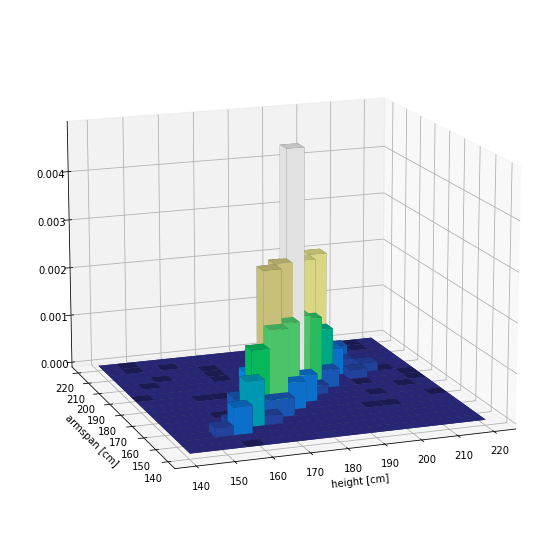

In [14]:
import matplotlib.colors as colors

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
plt.xlabel('height [cm]')
plt.ylabel('armspan [cm]')

hist, xedges, yedges = np.histogram2d(h, a, bins=16, range=[[140, 220], [140, 220]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 5 * np.ones_like(zpos)
dz = (hist.ravel())/(219*25)

fracs = dz.astype(float)/dz.max()
norm = colors.Normalize(fracs.min(), fracs.max())
colors = cm.terrain(norm(fracs))

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color = colors ,zsort='average', shade = True)
ax.view_init(15, 250)
plt.show();

Yet another way to visualize both the empirical joint density function, together with the empirical marginal density functions. 

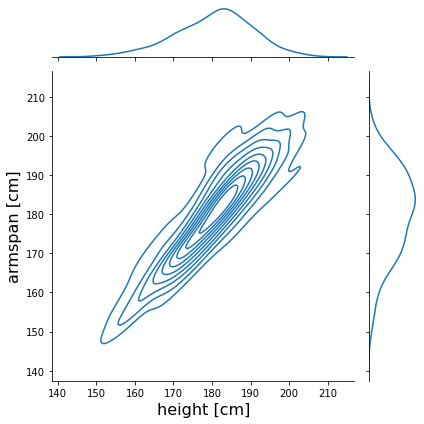

In [15]:
J = sns.jointplot(data=STUD, x='HEIGHT', y='ARMSPAN', kind = 'kde')
J.set_axis_labels('height [cm]', 'armspan [cm]', fontsize=16)

plt.tight_layout();

#### Question

#### 3.11 The marginal density functions do not perfectly match the shape of a normal distribution. Give at least one reason why this is the case.

#### Answer

3.11 

the normal distribution is a bell shape. because of randomness and variance the chance of a normal distribution perfectly fitted to the bellcurve is rare if not impossible. often normal distributions take the rough shape of the bellcurve. 